# Homework 4 (Neural Networks)
---

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 5 
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.4f}".format

In [31]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)

In [32]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [33]:
california.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,"2,401.0000",2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220


In [34]:
california.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [35]:
california.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,"2,401.0000",2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220


In [36]:
california.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,"20,640.0000","20,640.0000","20,640.0000","20,640.0000","20,640.0000","20,640.0000","20,640.0000","20,640.0000","20,640.0000"
mean,3.8707,28.6395,5.4290,1.0967,"1,425.4767",3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,"1,132.4621",10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,"1,166.0000",2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,"1,725.0000",3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,"35,682.0000","1,243.3333",41.9500,-114.3100,5.0000


In [37]:
california.frame.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

There are no missing values in the data, as we can see there are 20640 non null values in each of the 9 columns. This also makes this the largest dataset we've used so far

## Part 2 (Visualization)
---

Text(0.5, 1.0, 'y (House value) distribution')

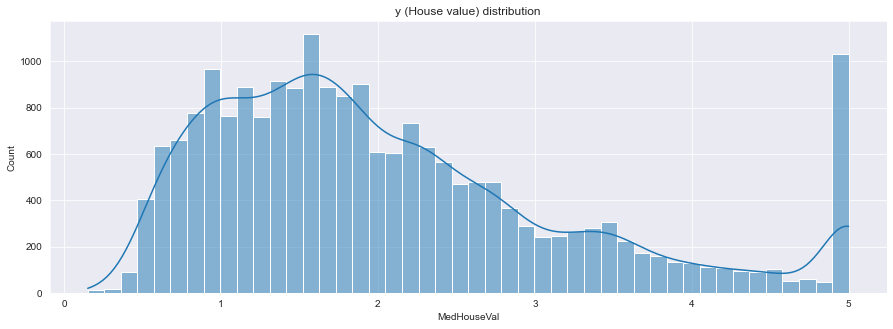

In [38]:
sns.histplot(data=california.target, kde=True)
plt.title('y (House value) distribution')

This shows us the distribution of median house values (our target variable) in the dataset. We can see a right skewed distribution with a large spike at 5 (500,000) which likely represents all house values greater than or equal to 500,000

<AxesSubplot:xlabel='Population', ylabel='MedHouseVal'>

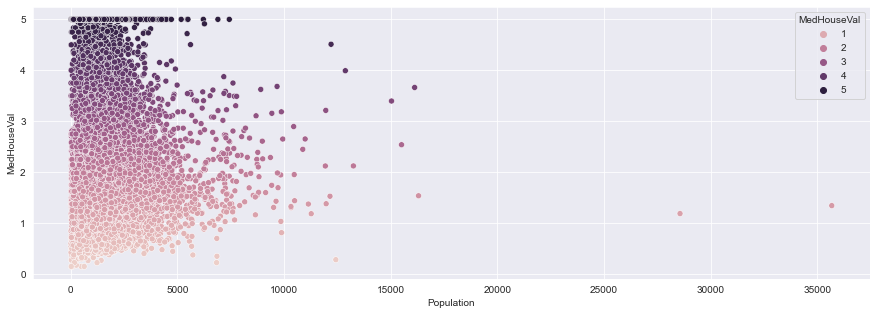

In [11]:
sns.scatterplot(x=california.frame['Population'], y=california.target, hue=california.target)

It seems that the most populous regions of California tend to skew towards lower house values which would likely be tied to lower incomes as well. This makes sense as you can put more small houses in the same area as a few large houses

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

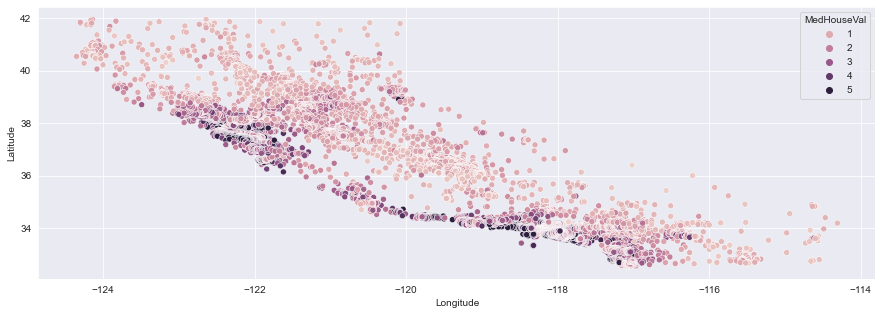

In [12]:
sns.scatterplot(data=california.frame, x='Longitude', y='Latitude', hue='MedHouseVal')

Though the scaling is a little off this clearly forms the shape of California. From this data we can see that almost all of the higher value homes are right on the coast, especially in the large cities like Los Angeles and San Diego.

Text(0.5, 1.0, 'Correlation Matrix')

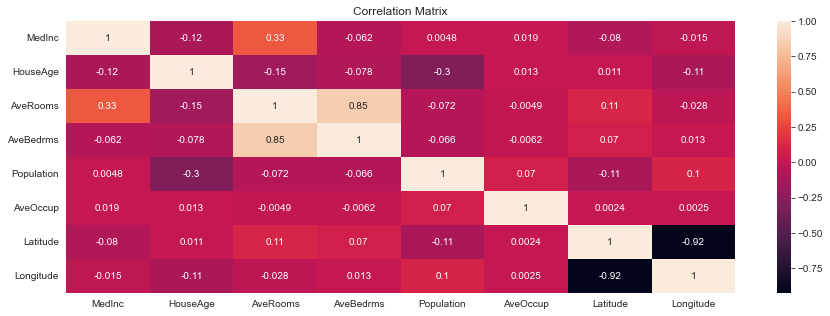

In [13]:
sns.heatmap(california.data.corr(), annot=True)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

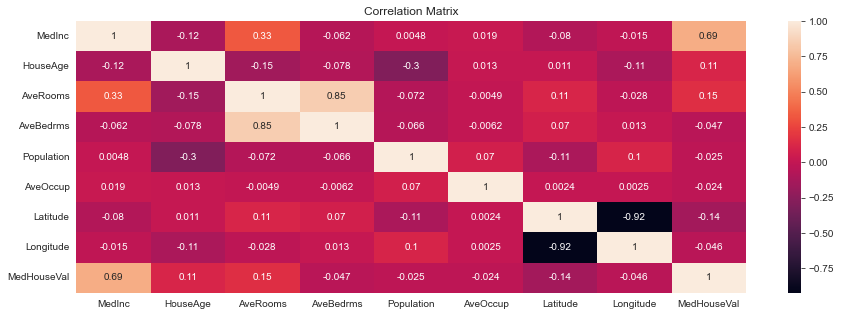

In [14]:
sns.heatmap(california.frame.corr(), annot=True)
plt.title('Correlation Matrix')

The only substantial correlation here is the relation between average number of rooms and average number of bedrooms which is to be expected since the set of bedrooms is a subset of the set of all rooms. Aside from that the next more correlated features are median income and average number of rooms which makes sense since the number of rooms is the most common indicator of value in real estate.

Additionally, latitude and longitude stand out because they are almost entirely uncorrelated which tracks since they are a coordinate systems and do not depend on any feature.

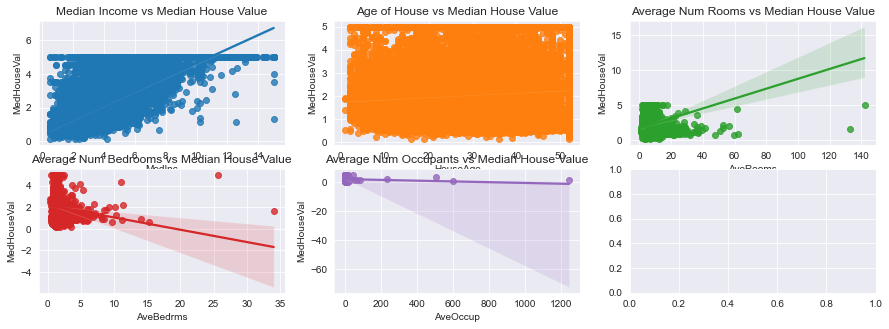

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

sns.regplot(data=california.frame, x="MedInc", y="MedHouseVal", color='tab:blue', ax=axes[0][0])
axes[0][0].set_title('Median Income vs Median House Value')

sns.regplot(data=california.frame, x="HouseAge", y="MedHouseVal", color='tab:orange', ax=axes[0][1])
axes[0][1].set_title('Age of House vs Median House Value')

sns.regplot(data=california.frame, x="AveRooms", y="MedHouseVal", color='tab:green', ax=axes[0][2])
axes[0][2].set_title('Average Num Rooms vs Median House Value')

sns.regplot(data=california.frame, x="AveBedrms", y="MedHouseVal", color='tab:red', ax=axes[1][0])
axes[1][0].set_title('Average Num Bedrooms vs Median House Value')

sns.regplot(data=california.frame, x="AveOccup", y="MedHouseVal", color='tab:purple', ax=axes[1][1])
axes[1][1].set_title('Average Num Occupants vs Median House Value')


plt.show()

From these plots we can see that median income has a pretty good positive correlation with house value. Similarly the average number of rooms and bedrooms also contribute a relatively good correlation minus the outliers. However, Number of occupants and age of house seem to have no relationship to the house's price

Text(0.5, 1.0, 'House age distribution')

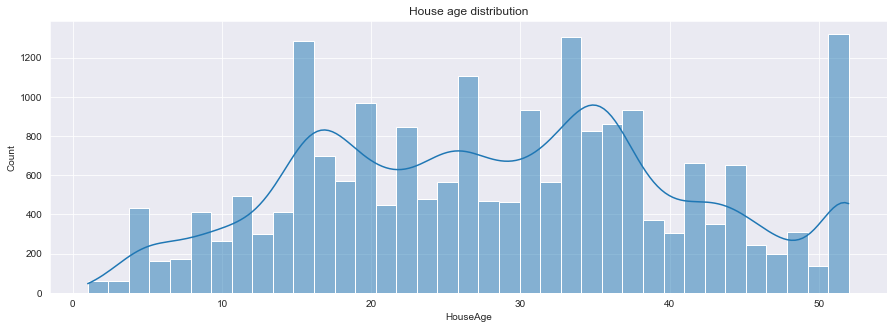

In [16]:
sns.histplot(data=california.frame['HouseAge'], kde=True)
plt.title('House age distribution')

From this plot we can see over time the peaks in house building which would likely have been during times of economic or population boom. As well as the steady decline in house production over the last 15 years. 

Again, here we can see that anything over the age of 50 years is grouped into a single value

## Part 3 (Model Creation and Evaluation)
---

In [17]:
from sklearn.preprocessing import StandardScaler

X = california.frame.drop('MedHouseVal', axis=1)
y = california.frame['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(130,64,32,16), max_iter=500).fit(X_train, y_train)

predictions = regr.predict(X_test)
regr.score(X_test, y_test)

0.786460999558301

The Model seems to be performing decently well. I am not using a seeded training so the results vary but I've seen mid 70s to low 80s

In [20]:
regr = MLPRegressor(hidden_layer_sizes=(130,64,32,16, 8, 4), max_iter=500).fit(X_train, y_train)

predictions = regr.predict(X_test)
regr.score(X_test, y_test)

0.7987823418692099

In [21]:
regr = MLPRegressor(hidden_layer_sizes=(512,256,128,64,32,16), max_iter=500).fit(X_train, y_train)

predictions = regr.predict(X_test)
regr.score(X_test, y_test)

0.7770088992067566

Adding two additional extra layers did nothing to improve the accuracy but it did pin my CPU at 100% for almost 5 minutes

In [22]:
regr = MLPRegressor(hidden_layer_sizes=(128, 64,32,16, 8), max_iter=1000).fit(X_train, y_train)

predictions = regr.predict(X_test)
regr.score(X_test, y_test)

0.7686370686050279

Increasing the number of iterations seems to make a larger difference in increasing the results, this run achieved over 80% on its first 2 attempts

In [26]:
from sklearn.model_selection import GridSearchCV

mlpr = MLPRegressor(max_iter=2000)
param_list = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic"], "solver": ["lbfgs", "sgd"], "alpha": [0.00005,0.0005]}
gridsearch = GridSearchCV(mlpr, param_list)
gridsearch.fit(X_train, y_train)

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


KeyboardInterrupt: 

I was unable to get the GridSearchCV to converge, even with a large number of iterations

## Part 4 Reading and Understanding the Data (Classification)
---

In [73]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [46]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [47]:
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
3,4.6000,3.1000,1.5000,0.2000,0
4,5.0000,3.6000,1.4000,0.2000,0


In [48]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [49]:
iris.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.0000,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993,1.0000
std,0.8281,0.4359,1.7653,0.7622,0.8192
min,4.3000,2.0000,1.0000,0.1000,0.0000
25%,5.1000,2.8000,1.6000,0.3000,0.0000
50%,5.8000,3.0000,4.3500,1.3000,1.0000
75%,6.4000,3.3000,5.1000,1.8000,2.0000
max,7.9000,4.4000,6.9000,2.5000,2.0000


In [50]:
iris.frame.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

Again with this dataset there are no null values. 150/150

In [53]:
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
3,4.6000,3.1000,1.5000,0.2000,0
4,5.0000,3.6000,1.4000,0.2000,0
...,...,...,...,...,...
145,6.7000,3.0000,5.2000,2.3000,2
146,6.3000,2.5000,5.0000,1.9000,2
147,6.5000,3.0000,5.2000,2.0000,2
148,6.2000,3.4000,5.4000,2.3000,2


.frame includes the target series
.data is without the target

In [54]:
X = iris.data
y = iris.frame['target']

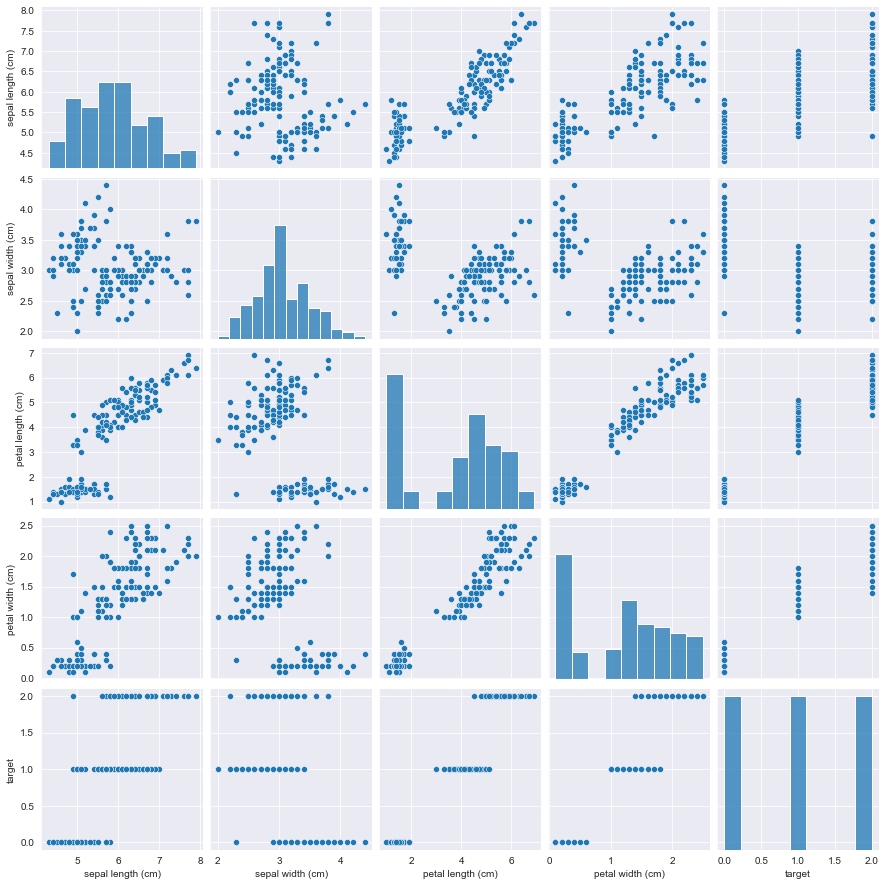

In [55]:
sns.pairplot(iris.frame)

From these plots we can see there are a number of good trends in the data that could be useful for classification. Petal width and petal length seem to be pretty separate in the target

Text(0.5, 1.0, 'Species vs. Sepal length Boxplot')

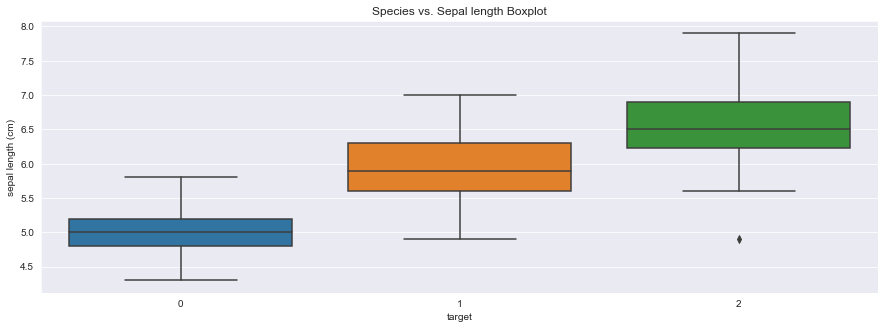

In [57]:
sns.boxplot(x=iris.frame['target'], y=iris.frame['sepal length (cm)'])
plt.title('Species vs. Sepal length Boxplot')

Aside from outliers the data shows distinct categories that means that sepal length is a fairly good predictor alone of the iris species

Text(0.5, 1.0, 'Species vs. Sepal width Boxplot')

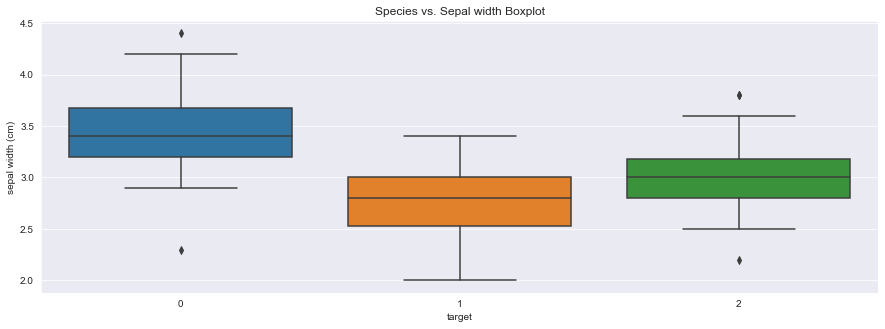

In [58]:
sns.boxplot(x=iris.frame['target'], y=iris.frame['sepal width (cm)'])
plt.title('Species vs. Sepal width Boxplot')

Here we see a good distinction between species 1 and 2 but not a clear separation between 2 and 3 based on sepal width

Text(0.5, 1.0, 'Species vs. Petal length Boxplot')

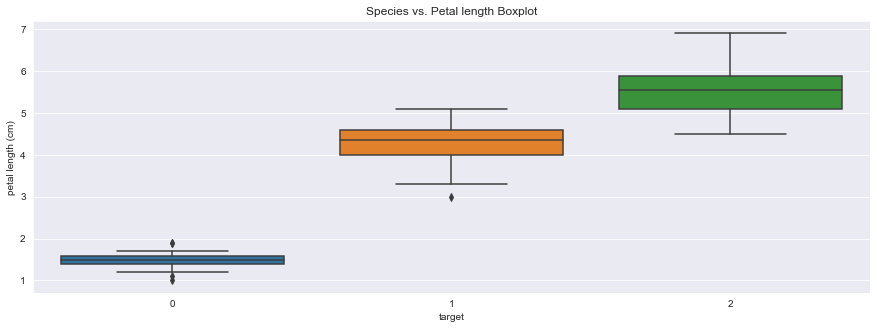

In [59]:
sns.boxplot(x=iris.frame['target'], y=iris.frame['petal length (cm)'])
plt.title('Species vs. Petal length Boxplot')

This plot shows a clear difference between all 3 of the species based on the petal length. This alone would be a fairly accurate classifier.

Text(0.5, 1.0, 'Species vs. Petal width Boxplot')

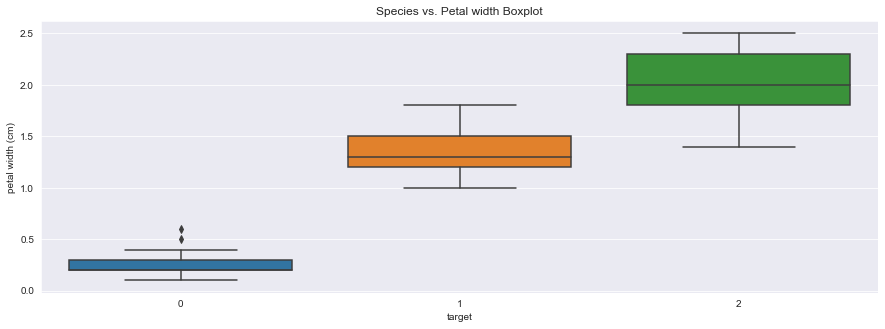

In [60]:
sns.boxplot(x=iris.frame['target'], y=iris.frame['petal width (cm)'])
plt.title('Species vs. Petal width Boxplot')

Again this is a clear distinction between the 3 categories. The petal width and length both are good predictors of the species

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

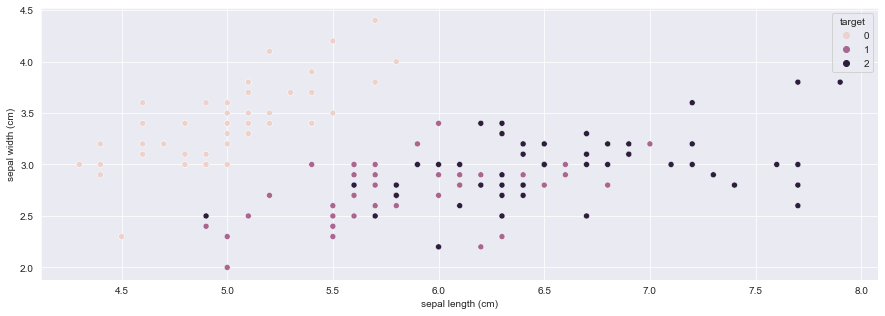

In [62]:
sns.scatterplot(data=iris.frame, x='sepal length (cm)', y='sepal width (cm)', hue='target')

It seems that from this data there is a good difference in characteristics between species 0 and the other two however, species 1 and 2 are much closer together

## Part 5 Model Creation and Evaluation
---

In [74]:
from sklearn.preprocessing import StandardScaler

X = iris.frame.drop('target', axis=1)
y = iris.frame['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [64]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.9007,1.0190,-1.3402,-1.3154
1,-1.1430,-0.1320,-1.3402,-1.3154
2,-1.3854,0.3284,-1.3971,-1.3154
3,-1.5065,0.0982,-1.2834,-1.3154
4,-1.0218,1.2492,-1.3402,-1.3154


In [65]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
from sklearn.neural_network import MLPClassifier 
 
mlp = MLPClassifier(hidden_layer_sizes=(256,128,64,32), max_iter=500, activation='relu') 
mlp.fit(X_train,y_train) 

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), max_iter=500)

In [77]:
predictions = mlp.predict(X_test)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix 
 
print(confusion_matrix(y_test,predictions)) 
print(classification_report(y_test,predictions)) 

[[16  0  0]
 [ 0  8  1]
 [ 0  3 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.73      0.89      0.80         9
           2       0.94      0.85      0.89        20

    accuracy                           0.91        45
   macro avg       0.89      0.91      0.90        45
weighted avg       0.92      0.91      0.91        45



In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mlp = MLPClassifier(hidden_layer_sizes=(512,256,128,64,32,16), max_iter=1000, activation='relu') 
mlp.fit(X_train,y_train) 

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions)) 
print(classification_report(y_test,predictions)) 

[[13  0  0]
 [ 0  9  2]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.82      0.86        11
           2       0.91      0.95      0.93        21

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



Simply by increasing the number of hidden layers and doubling the iterations we can achive 93-96% which is a noticable improvement on the prior model

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mlp = MLPClassifier(hidden_layer_sizes=(512,256,128,64,32,16,8,3), max_iter=1000, activation='relu') 
mlp.fit(X_train,y_train) 

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions)) 
print(classification_report(y_test,predictions)) 

[[13  0  0]
 [ 0 12  2]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.86      0.89        14
           2       0.89      0.94      0.92        18

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



I don't think this model could get much better without overfitting the data since we have a small number of samples. However, I think that due to the relative simplicity of this domain it performs a good result with little other consideration; ie the outliers don't really need to be accounted for to achieve almost perfect classification.

<AxesSubplot:>

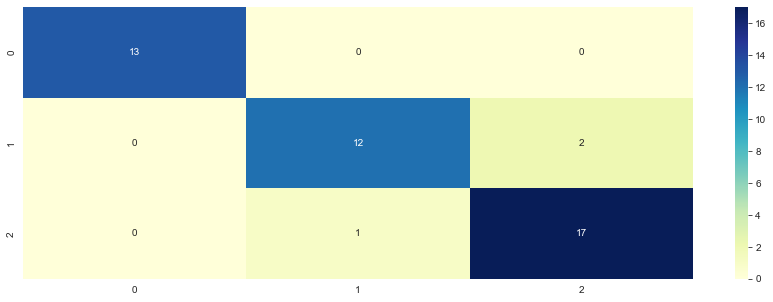

In [90]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap="YlGnBu")